#**Netflix Original Films & IMDB Scores - EDA**


This dataset consists of all Netflix original films released as of June 1st, 2021. Additionally, it also includes all Netflix documentaries and specials. The data was webscraped off of this Wikipedia page, which was then integrated with a dataset consisting of all of their corresponding IMDB scores. IMDB scores are voted on by community members, and the majority of the films have 1,000+ reviews.

THE dataset available on [Kaggle.](https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores)

Dataset consist of:


*   Title
*   Genre
*   Premiere date
*   Runtime
*   IMDB scores
*   Languages



## This colab notebooks cover this question:

1.   [In which language were the long-running films created according to the dataset? Make a visualization.](#Question1)
2.   [Find and visualize the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020.](#Question2)
3.   [Which genre has the highest IMDB rating among movies shot in English?](#Question3)
4.   [What is the average 'runtime' of movies shot in 'Hindi'?](#Question4)
5.   [How many categories does the Genre Column have and what are they? Visualize it.](#Question5)
6.   [Find the 3 most used languages in the movies in the data set.](#Question6)
7.   [Top 10 Movies With IMDB Ratings](#Question7)
8.   [What is the correlation between IMDB score and 'Runtime'? Examine and visualize.](#Question8)
9.   [Top 10 Genre by IMDB Score](#Question9)
10.  [What are the top 10 movies with the highest 'runtime'? Visualize it.](#Question10)
11.  [In which year was the most movies released? Visualize it.](#Question11)
12.  [Which language movies have the lowest average IMDB rating? Visualize it.](#Question12)
13.  [Which year has the greatest total runtime?](#Question13)
14.  [What is the "Genre" where each language is used the most?](#Question14)
15.  [Is there any outlier data in the data set? Please explain.](#Question15)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data = pd.read_csv('/content/NetflixOriginals.csv', encoding='latin1')
data

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,5-Aug-19,58,2.5,English/Japanese
1,Dark Forces,Thriller,21-Aug-20,81,2.6,Spanish
2,The App,Science fiction/Drama,26-Dec-19,79,2.6,Italian
3,The Open House,Horror thriller,19-Jan-18,94,3.2,English
4,Kaali Khuhi,Mystery,30-Oct-20,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,31-Dec-18,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,9-Oct-15,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,16-Dec-18,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,8-Dec-20,89,8.6,Portuguese


In [ ]:
data.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [ ]:
data.isnull().sum()

,0
Title,0
Genre,0
Premiere,0
Runtime,0
IMDB Score,0
Language,0


In [ ]:
data['Premiere']= pd.to_datetime(data['Premiere'])
data['Year'] = data.Premiere.dt.year
data['Month'] = data.Premiere.dt.month_name()
data['Weekday'] = data.Premiere.dt.day_name()

data.head()

/tmp/ipython-input-1020915658.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year,Month,Weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,August,Monday
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,August,Friday
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,December,Thursday
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,January,Friday
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,October,Friday


<a name="Question1"></a>
###**1-In which language were the long-running films created according to the dataset? Make a visualization.**


In [ ]:
data_temp = data.sort_values(by='Runtime', ascending=False)

   Language  Count
0   English     11
1     Hindi      6
2  Japanese      2
3   Spanish      1


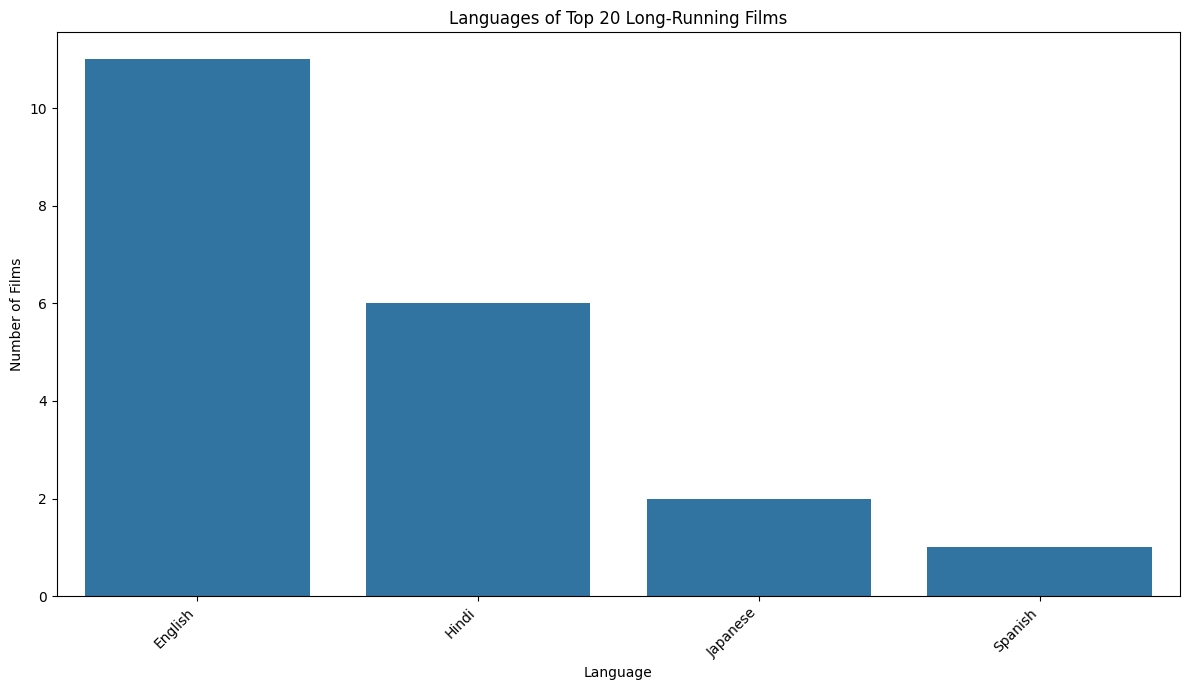

In [ ]:
# Define what 'long-running' means (e.g., top 20 films)
top_n_films = data_temp.head(20)
# print(top_n_films)

# Get the counts of each language in these top films
language_counts = top_n_films['Language'].value_counts().reset_index()
language_counts.columns = ['Language', 'Count']
print(language_counts)

# Create the visualization
plt.figure(figsize=(12, 7))
sns.barplot(x='Language', y='Count', data=language_counts)
plt.title('Languages of Top 20 Long-Running Films')
plt.xlabel('Language')
plt.ylabel('Number of Films')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<a name="Question2"></a>
### **2-Find and visualize the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020.**

In [ ]:
data_doc = data[data.Genre.str.contains('Documentary')
&((data["Year"]== 2019)|
((data["Year"]== 2020) & ((data["Month"] ==("January"))|
                          (data["Month"] ==("February"))|
                          (data["Month"] ==("March"))|
                          (data["Month"] ==("April"))|
                          (data["Month"] ==("May"))|
                          (data["Month"] ==("June")))))]

In [ ]:
fig = px.scatter(data_doc,x='Year',y='IMDB Score',color="Month")
fig.update_traces(marker_size=12)
fig.show()

<a name="Question3"></a>
### **3-Which genre has the highest IMDB rating among movies shot in English?**

In [ ]:
# 1. Filter for English language movies
english_movies = data[data['Language'] == "English"]
# 2. Group by Genre and calculate the average IMDB Score
genre_averages = english_movies.groupby('Genre')['IMDB Score'].mean()

# 3. Find the genre with the highest average score
highest_rated_genre = genre_averages.sort_values(ascending=False).head(10)

print("Highest Average Rated Genre (English):")
print(highest_rated_genre.idxmax(), "-", highest_rated_genre.max())



Highest Average Rated Genre (English):
Animation/Christmas/Comedy/Adventure - 8.2


<a name="Question4"></a>
### **4-What is the average 'runtime' of movies shot in 'Hindi'?**

In [ ]:
Hindi_Movies = data[data['Language'] == "Hindi"]
Hindi_Movies['Runtime'].mean()
print("Hindi Movies Average Runtime:", Hindi_Movies['Runtime'].mean())

Hindi Movies Average Runtime: 115.78787878787878


<a name="Question5"></a>
### **5-How many categories does the Genre Column have and what are they? Visualize it.**

In [ ]:
data.Genre.value_counts()
genre = data.Genre.value_counts()
print("Number of Categories:", len(genre))
print("Categories:", genre.index.tolist())

Number of Categories: 115
Categories: ['Documentary', 'Drama', 'Comedy', 'Romantic comedy', 'Thriller', 'Comedy-drama', 'Crime drama', 'Horror', 'Biopic', 'Action', 'Aftershow / Interview', 'Concert Film', 'Romance', 'Action comedy', 'Romantic drama', 'Animation', 'Science fiction/Thriller', 'Variety show', 'Science fiction', 'Psychological thriller', 'Animation / Short', 'One-man show', 'Sports-drama', 'Action-thriller', 'Science fiction/Drama', 'Horror thriller', 'Western', 'Dark comedy', 'Mystery', 'Family film', 'Black comedy', 'Comedy / Musical', 'Musical', 'Family', 'Superhero', 'Horror-thriller', 'Mockumentary', 'Anime/Science fiction', 'Musical comedy', 'Spy thriller', 'War drama', 'War', 'Adventure', 'Satire', 'Making-of', 'Political thriller', 'Anime / Short', 'Horror anthology', 'Heist film/Thriller', 'Musical/Western/Fantasy', 'Romance drama', 'Christian musical', 'Romantic teen drama', 'Adventure/Comedy', 'Horror comedy', 'Romantic teenage drama', 'Action/Science fiction',

In [ ]:
fig = px.bar(genre, x= genre.index, y=genre.values, labels={'y':'Number of Movies from the Genre', 'index':'Genres'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

<a name="Question6"></a>
### **6-Find the 3 most used languages in the movies in the data set.**

In [ ]:
data.Language.unique()
data.Language.value_counts()
top_3_languages = data.Language.value_counts().head(3)
top_3_languages

,count
Language,
English,401
Hindi,33
Spanish,31


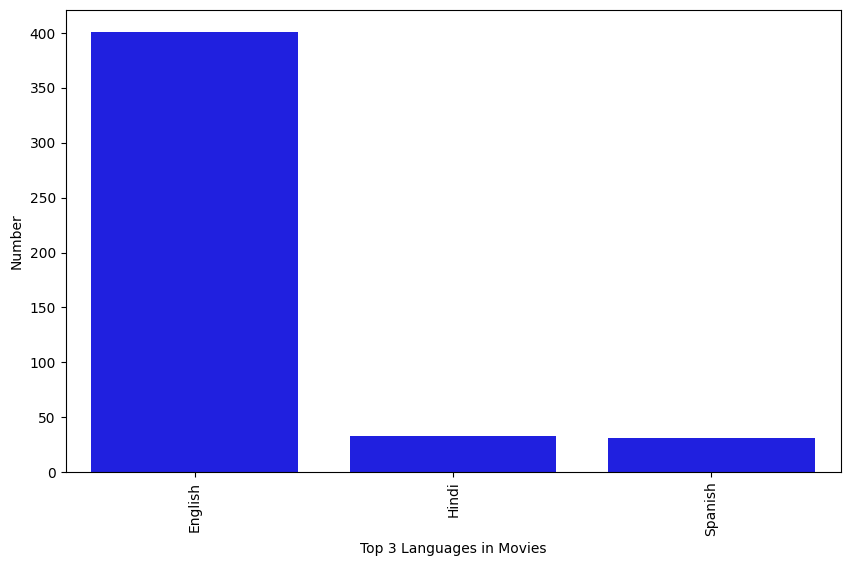

In [ ]:
# plotting a bar graph for better visualisation
plt.figure(figsize=(10,6))
sns.barplot(x=top_3_languages.index, y=top_3_languages.values, color='blue')
plt.xlabel('Top 3 Languages in Movies')
plt.xticks(rotation=90)
plt.ylabel('Number')
plt.show()

<a name="Question7"></a>
### **7- Top 10 Movies With IMDB Ratings**

In [ ]:
top_10_movie = data.sort_values(by='IMDB Score', ascending=False).head(10)
print(top_10_movie)

                                           Title         Genre   Premiere  \
583     David Attenborough: A Life on Our Planet   Documentary 2020-10-04   
582    Emicida: AmarElo - It's All For Yesterday   Documentary 2020-12-08   
581                      Springsteen on Broadway  One-man show 2018-12-16   
579        Taylor Swift: Reputation Stadium Tour  Concert Film 2018-12-31   
578   Ben Platt: Live from Radio City Music Hall  Concert Film 2020-05-20   
580  Winter on Fire: Ukraine's Fight for Freedom   Documentary 2015-10-09   
576                      Cuba and the Cameraman    Documentary 2017-11-24   
577                       Dancing with the Birds   Documentary 2019-10-23   
575        The Three Deaths of Marisela Escobedo   Documentary 2020-10-14   
574                                   Seaspiracy   Documentary 2021-03-24   

     Runtime  IMDB Score                  Language  Year     Month    Weekday  
583       83         9.0                   English  2020   October     S

/tmp/ipython-input-2498717403.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



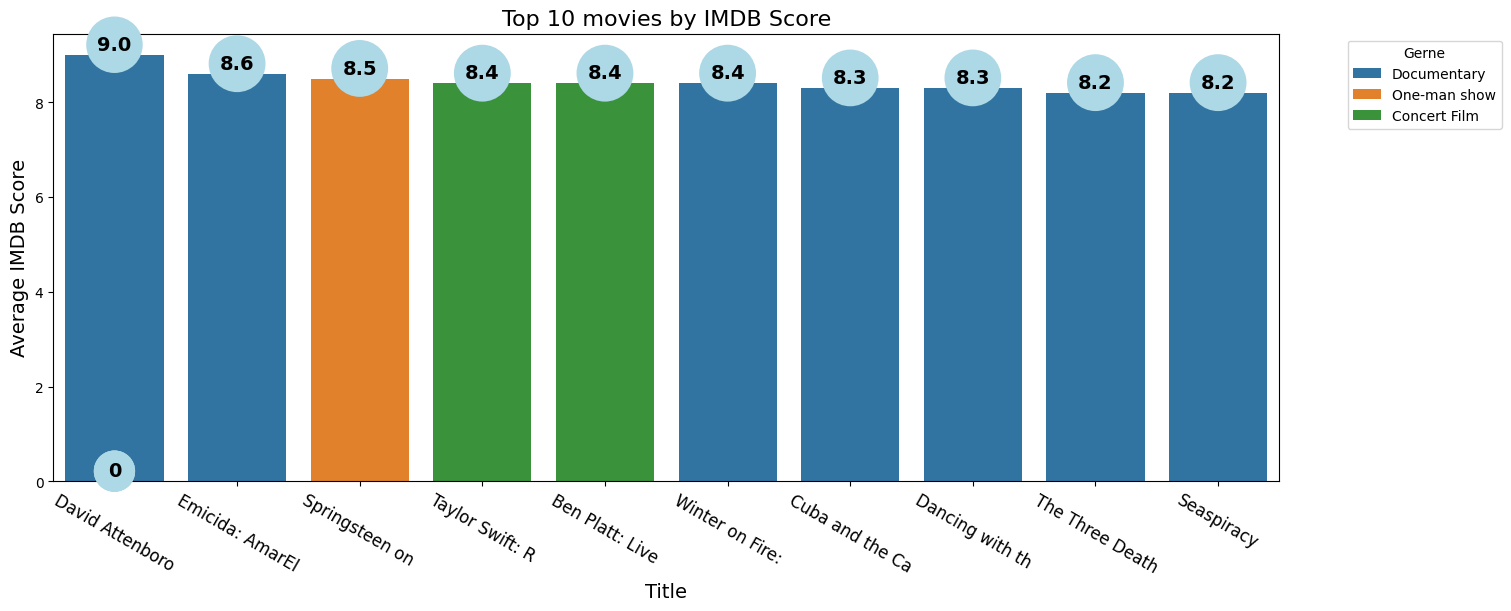

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (15, 6), constrained_layout = True)
ax = sns.barplot(x = 'Title', y = 'IMDB Score', data = top_10_movie, hue = 'Genre')

for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()+0.1,
            s = f"{i.get_height()}",
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'black',
            bbox=dict(boxstyle="circle,pad=0.5", fc='lightblue', ec="lightblue", lw=2))


ax.set_xlabel('Title', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)
ax.set_xticklabels([i[:15] for i in top_10_movie['Title'].unique()], fontsize=12, rotation = -30)
plt.title('Top 10 movies by IMDB Score', fontsize=16)
plt.legend(title='Gerne', bbox_to_anchor=(1.05, 1), loc='upper left');

<a name="Question8"></a>
### **8-What is the correlation between IMDB score and 'Runtime'? Examine and visualize.**


In [ ]:
corr =  data[['IMDB Score','Runtime']].corr()
corr

,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


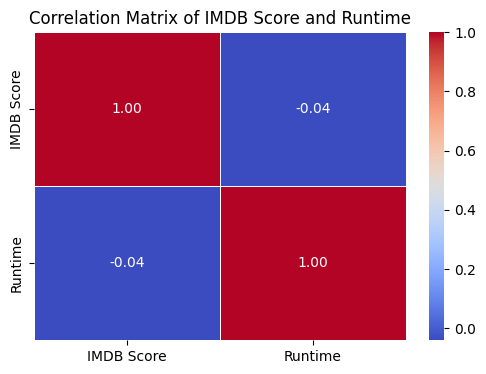

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of IMDB Score and Runtime')
plt.show()

In [ ]:
fig = px.scatter(data, x='IMDB Score', y='Runtime', color='Genre')
fig.show()

<a name="Question9"></a>
### **9-Top 10 Genre by IMDB Score**

In [ ]:
top_10_genre = data.groupby('Genre')['IMDB Score'].mean().sort_values(ascending=False).head(10)
print(top_10_genre)

Genre
Animation/Christmas/Comedy/Adventure    8.200000
Musical / Short                         7.700000
Concert Film                            7.633333
Anthology/Dark comedy                   7.600000
Animation / Science Fiction             7.500000
Making-of                               7.450000
Action-adventure                        7.300000
Drama-Comedy                            7.200000
Historical drama                        7.200000
Coming-of-age comedy-drama              7.200000
Name: IMDB Score, dtype: float64


/tmp/ipython-input-3934753748.py:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



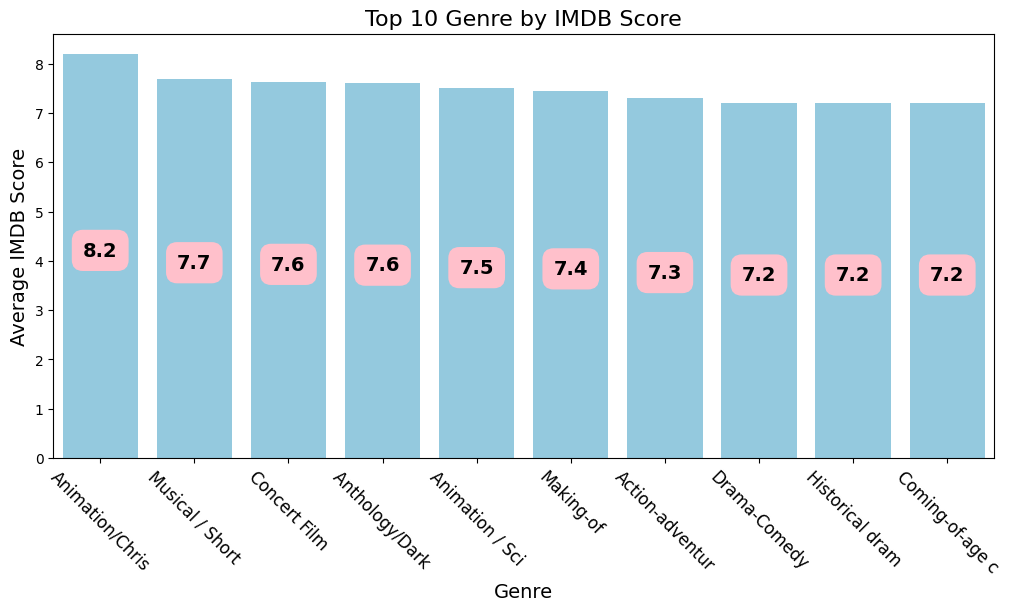

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (10, 6), constrained_layout = True)
# Convert the Series to a DataFrame for seaborn
top_10_genre_df = top_10_genre.reset_index()
ax = sns.barplot(x = 'Genre', y = 'IMDB Score', data = top_10_genre_df, color = 'skyblue')

for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = f"{round(i.get_height(),1)}",
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'black',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))


ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)
ax.set_xticklabels([i[:15] for i in top_10_genre_df['Genre'].unique()], fontsize=12, rotation = -45 )
plt.title('Top 10 Genre by IMDB Score', fontsize=16);

<a name="Question10"></a>
### **10-What are the top 10 movies with the highest 'runtime'? Visualize it.**

                                           Title         Genre   Premiere  \
583     David Attenborough: A Life on Our Planet   Documentary 2020-10-04   
582    Emicida: AmarElo - It's All For Yesterday   Documentary 2020-12-08   
581                      Springsteen on Broadway  One-man show 2018-12-16   
579        Taylor Swift: Reputation Stadium Tour  Concert Film 2018-12-31   
578   Ben Platt: Live from Radio City Music Hall  Concert Film 2020-05-20   
580  Winter on Fire: Ukraine's Fight for Freedom   Documentary 2015-10-09   
576                      Cuba and the Cameraman    Documentary 2017-11-24   
577                       Dancing with the Birds   Documentary 2019-10-23   
575        The Three Deaths of Marisela Escobedo   Documentary 2020-10-14   
574                                   Seaspiracy   Documentary 2021-03-24   

     Runtime  IMDB Score                  Language  Year     Month    Weekday  
583       83         9.0                   English  2020   October     S

/tmp/ipython-input-1079483920.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




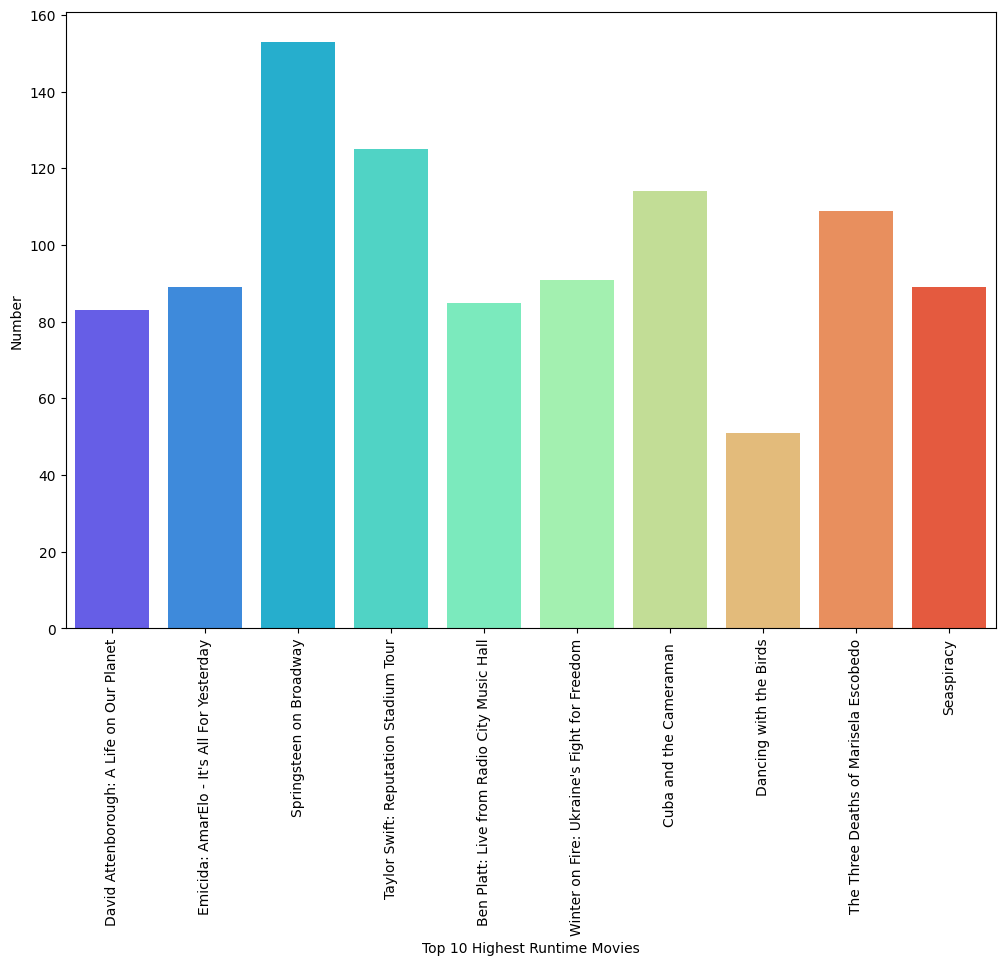

In [ ]:
top_10_movie
print(top_10_movie)

# plotting a bar graph for better visualisation
plt.figure(figsize=(12,8))
sns.barplot(x=top_10_movie["Title"],y=top_10_movie["Runtime"],data=data,palette='rainbow')
plt.xlabel('Top 10 Highest Runtime Movies')
plt.xticks(rotation=90)
plt.ylabel('Number')
plt.show()

<a name="Question11"></a>
### **11-In which year was the most movies released? Visualize it.**

Year with most released 2020


/tmp/ipython-input-3178592711.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




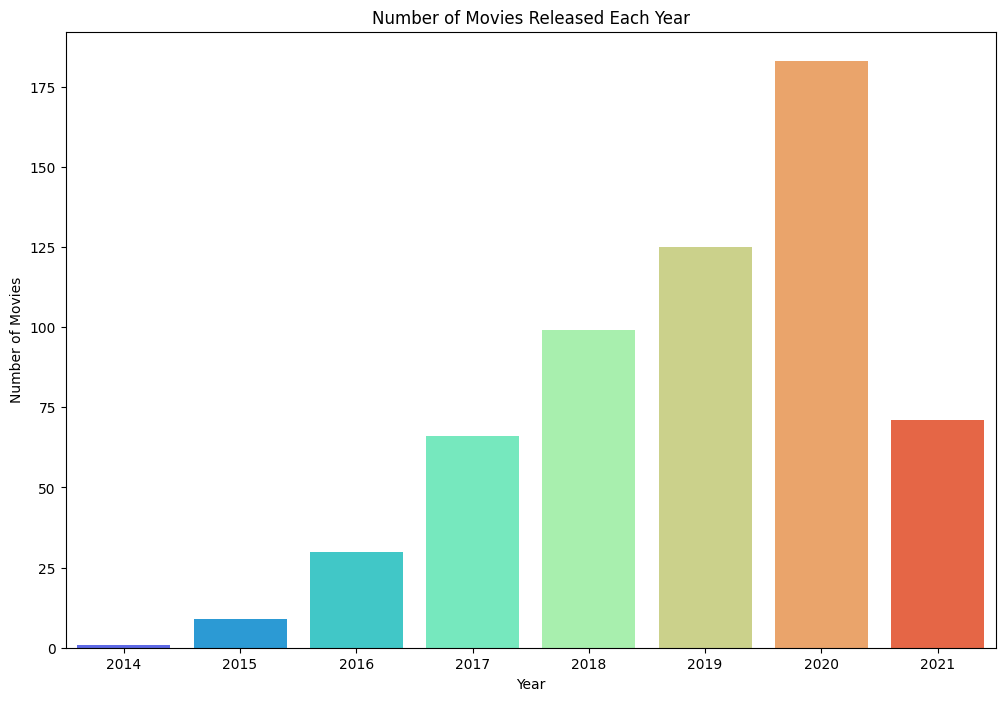

In [ ]:
year_most_movie_released = data[data.groupby('Year')['Title'].transform('count') == data.groupby('Year')['Title'].transform('count').max()]
year_most_movie_released = year_most_movie_released.Year.values[0]
print("Year with most released",year_most_movie_released)

plt.figure(figsize=(12,8))
sns.countplot(x='Year', data=data,palette='rainbow')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

<a name="Question12"></a>
### **12-Which language movies have the lowest average IMDB rating? Visualize it.**

In [ ]:
movie_avg_scores = data.groupby('Language')['IMDB Score'].mean().sort_values(ascending=True)
print("Average IMDB Score per Language (sorted):")
print(movie_avg_scores.head(15))

lowest_10_avg_scores = movie_avg_scores.head(10)
print("\nTop 10 Languages with the Lowest Average IMDB Rating:")
print(lowest_10_avg_scores)

Average IMDB Score per Language (sorted):
Language
Malay               4.200000
English/Japanese    4.400000
Norwegian           5.100000
Filipino            5.100000
Polish              5.166667
Thai                5.450000
Swedish             5.500000
Italian             5.542857
Spanish/Basque      5.600000
German              5.640000
Turkish             5.660000
French              5.770000
Dutch               5.800000
Indonesian          5.844444
Korean              5.916667
Name: IMDB Score, dtype: float64

Top 10 Languages with the Lowest Average IMDB Rating:
Language
Malay               4.200000
English/Japanese    4.400000
Norwegian           5.100000
Filipino            5.100000
Polish              5.166667
Thai                5.450000
Swedish             5.500000
Italian             5.542857
Spanish/Basque      5.600000
German              5.640000
Name: IMDB Score, dtype: float64


/tmp/ipython-input-446261197.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




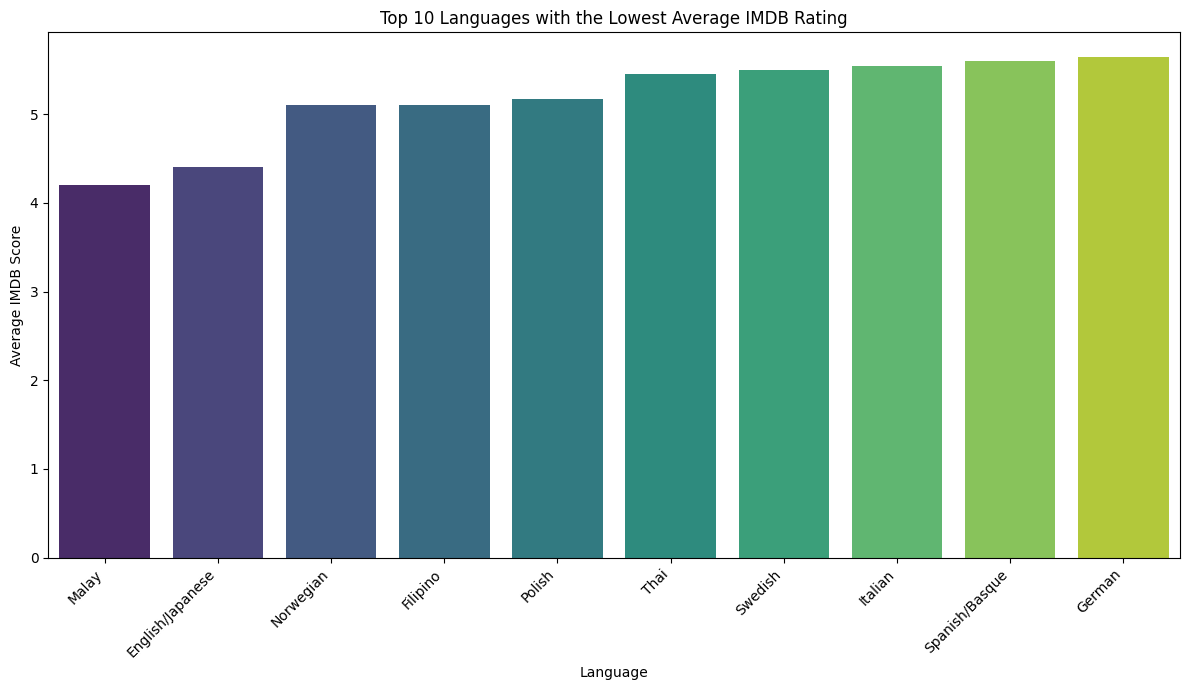

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x=lowest_10_avg_scores.index, y=lowest_10_avg_scores.values, palette='viridis')
plt.title('Top 10 Languages with the Lowest Average IMDB Rating')
plt.xlabel('Language')
plt.ylabel('Average IMDB Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<a name="Question13"></a>
### **13-Which year has the greatest total runtime?**

/tmp/ipython-input-687432247.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




The year with the greatest total runtime is 2020 with a total runtime of 17384 minutes.


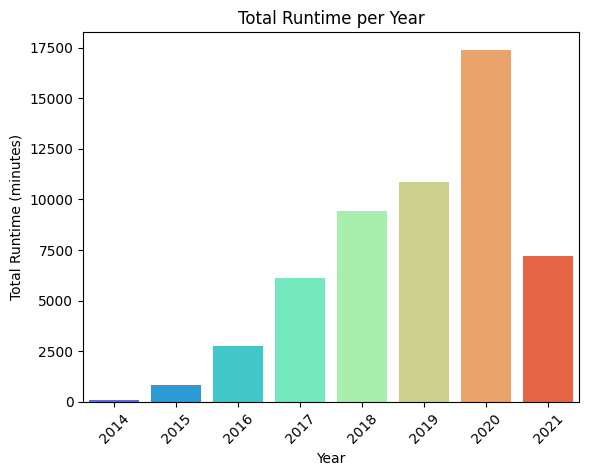

In [ ]:
# 1. Aggregating the data
total_runtime_per_year = data.groupby('Year')['Runtime'].sum().reset_index()

# 2. Identifying the maximum values
greatest_runtime_year = total_runtime_per_year.loc[total_runtime_per_year['Runtime'].idxmax(), 'Year']
greatest_runtime_value = total_runtime_per_year['Runtime'].max()

# 3. Visualization
# We use the aggregated dataframe to ensure the bars represent the SUM
sns.barplot(x='Year', y='Runtime', data=total_runtime_per_year, palette='rainbow')

plt.xlabel('Year')
plt.ylabel('Total Runtime (minutes)')
plt.title('Total Runtime per Year')
plt.xticks(rotation=45)
plt.savefig('runtime_per_year.png')

print(f"The year with the greatest total runtime is {greatest_runtime_year} "
      f"with a total runtime of {greatest_runtime_value} minutes.")

<a name="Question14"></a>
### **14-What is the "Genre" where each language is used the most?**

In [ ]:
most_used_genre_per_language = data.groupby(['Language', 'Genre']).size().reset_index(name='Count')
idx = most_used_genre_per_language.groupby(['Language'])['Count'].transform(max) == most_used_genre_per_language['Count']
result = most_used_genre_per_language[idx].sort_values(by=['Language', 'Count'], ascending=[True, False])

# Handle cases where a language might have multiple genres with the same max count
result = result.drop_duplicates(subset='Language', keep='first')

print("The 'Genre' where each language is used the most:")
print(result)

The 'Genre' where each language is used the most:
                       Language                  Genre  Count
0                       Bengali            Documentary      1
1                         Dutch            Crime drama      1
44                      English            Documentary    120
105                English/Akan              War drama      1
106              English/Arabic            Documentary      1
107               English/Hindi            Documentary      2
108            English/Japanese            Crime drama      1
110              English/Korean       Action-adventure      1
111            English/Mandarin            Documentary      2
112             English/Russian            Documentary      1
113             English/Spanish            Documentary      5
114             English/Swedish            Documentary      1
115  English/Taiwanese/Mandarin                  Drama      1
116    English/Ukranian/Russian            Documentary      1
117                 

/tmp/ipython-input-1760357202.py:2: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.



<a name="Question15"></a>
### **15-Is there any outlier data in the data set? Please explain.**

###Let's look the Runtime for detecting outlier. We can easily see one outlier with no doubt. The outlier of Runtime column' is "The Irishman"

In [ ]:
fig = px.scatter(data, y='Title', x='Runtime')
fig.show()

#The summary statistics for your data DataFrame are displayed above. Here's a breakdown of what you're seeing:

###count: This row shows the number of non-null entries for each column. For 'Runtime', 'IMDB Score', and 'Year', there are 584 entries, indicating no missing values in these columns.
##mean: This is the average value for each numerical column. For example, the average 'Runtime' is about 93.58 minutes, and the average 'IMDB Score' is about 6.27.
##min: The minimum value found in each column. The shortest movie is 4 minutes, and the lowest IMDB score is 2.5.
##25% (First Quartile): 25% of the values are below this number. For 'Runtime', 25% of movies are 86 minutes or shorter. For 'IMDB Score', 25% of movies have a score of 5.7 or less.
##50% (Median): The middle value when the data is sorted. The median runtime is 97 minutes, and the median IMDB score is 6.35.
##75% (Third Quartile): 75% of the values are below this number. For 'Runtime', 75% of movies are 108 minutes or shorter. For 'IMDB Score', 75% of movies have a score of 7.0 or less.
##max: The maximum value in each column. The longest movie is 209 minutes, and the highest IMDB score is 9.0.
##std (Standard Deviation): This measures the dispersion of data points around the mean. A higher standard deviation indicates a wider spread of values.